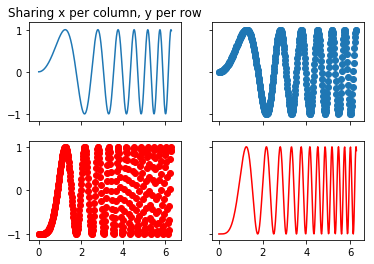

C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\figure_1


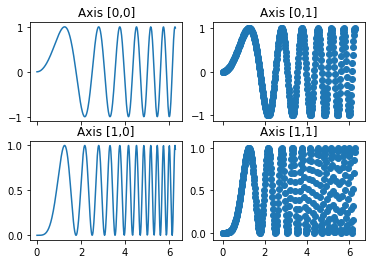

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2, sharex='col')
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
print file_destination
plt.savefig(file_destination+'.eps', format='eps', dpi=2000)
plt.show()

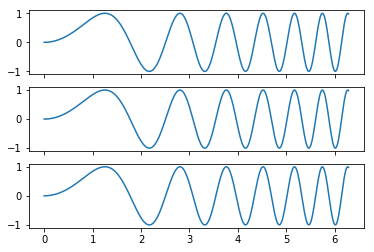

In [2]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(3, 1, sharex='col')
for a in axarr:
    a.plot(x, y)
plt.show()

In [4]:
import numpy as np
from generate_noisy_data import generate_noisy_data
from generate_noisy_data import run_noisy_parameter_perturbation
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from kotte_model import ident_parameter_name
from kotte_model import kotte_parameter_name
from process_ident_data import process_info
from plot_ident_results import get_flux_parameter_plot_data

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
all_options_exp_1 = []
all_options_exp_2 = []
all_options_exp_3 = []
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get initial noisy system steady state
initial_options = (cvode_options, ode_parameter_values)
noisy_initial_ss, _, _, _ = generate_noisy_data(y0, initial_options, 1)

# all parameter perturbations
parameter_perturbation = [(14, 0), (14, 4), (14, 9),
                          (11, .1), (11, .5), (11, 1), (11, -.1), (11, -.5),
                          (12, .1), (12, .5), (12, 1), (12, -.1), (12, -.5),
                          (13, .1), (13, .5), (13, 1), (13, -.1), (13, -.5)]
perturbation_options = {'ode_parameters':ode_parameter_values, 'cvode_options':cvode_options}
noisy_ss, noisy_dynamic, perturbation_details, _, dynamic_info = \
    run_noisy_parameter_perturbation(parameter_perturbation, noisy_initial_ss["y"], perturbation_options)
    
noisy_exp_xss = []
noisy_exp_fss = []
noisy_exp_ssid = []
for ss_values in noisy_ss:
    noisy_exp_xss.append(ss_values["y"])
    noisy_exp_fss.append(ss_values["flux"])
    noisy_exp_ssid.append(ss_values["ssid"])

# experimental data based on order of inputs for lambdify expressions
exp_flux_index = np.array([0, 3, 2, 4])
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(noisy_exp_xss, noisy_exp_fss, perturbation_details, 3, exp_flux_index)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=10)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = \
    process_info(ident_details,
                 experimental_datasets,
                 perturbation_details,
                 ident_parameter_name, kotte_parameter_name)



Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.03224704794 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 280
 Number of function evaluations                  : 341
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jaco

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0174798471433 seconds.
Perturbation 13

Final Run Statistics: --- 

 Number of steps                                 : 331
 Number of function evaluations                  : 438
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 18
 Number of error test failures                   : 19
 Number of nonlinear iterations                  : 434
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0239986919842 seconds.
Perturbation 14

Final Run Statistics: --- 

 Number of steps                                 : 269
 Number of function evaluatio

In [6]:
original_data_ident

[[{'experiment_id': (0, 1, 5),
   'id': 3,
   'parameter_ids': [0, 1, 2, 3, 4, 6, 7, 8, 9, 11],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
          [ 2.,  1.]])}],
 [],
 [{'experiment_id': (0, 1, 4),
   'id': 2,
   'parameter_ids': [0, 1, 2, 3, 4, 6, 8, 9],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
          [ 2.,  2.]])},
  {'experiment_id': (0, 1, 6),
   'id': 4,
   'parameter_ids': [0, 1, 2, 3, 4, 9, 10, 11],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
          [ 2.,  2.]])},
  {'experiment_id': (0, 1, 7),
   'id': 5,
   'parameter_ids': [0, 1, 2, 3, 4, 6, 9, 11],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
          [ 2.,  2.]])},
  {'experiment_id': (0, 1, 9),
   'id': 7,
   'parameter_ids': [0, 1, 2, 3, 4, 6, 9, 11],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
          [ 2.,  2.]])},
  {'experiment_id': (0, 1, 10),
   'id': 8,
   'parameter_ids': [0, 1, 2, 3, 4, 9, 10, 11],
   'ssid': array([[ 2.,  2.],
          [ 2.,  2.],
         

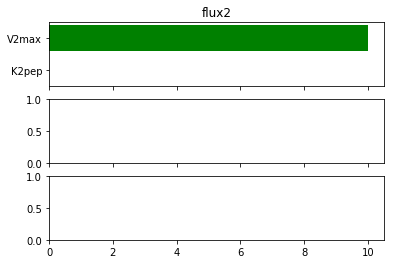

In [7]:
# plot results
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
get_flux_parameter_plot_data(original_data_ident, file_destination)

In [16]:
from plot_ident_results import plot_identifiable_parameter
kotte_sym_ident

NameError: name 'kotte_sym_ident' is not defined

Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0422723376606 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 308
 Number of function evaluations                  : 386
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Ja

Final Run Statistics: --- 

 Number of steps                                 : 317
 Number of function evaluations                  : 410
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 18
 Number of error test failures                   : 17
 Number of nonlinear iterations                  : 406
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0263634542658 seconds.
Perturbation 15

Final Run Statistics: --- 

 Number of steps                                 : 342
 Number of function evaluations                  : 460
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to J


Identifiability for Dataset 162 of 1000

Identifiability for Dataset 163 of 1000

Identifiability for Dataset 164 of 1000

Identifiability for Dataset 165 of 1000

Identifiability for Dataset 166 of 1000

Identifiability for Dataset 167 of 1000

Identifiability for Dataset 168 of 1000

Identifiability for Dataset 169 of 1000

Identifiability for Dataset 170 of 1000

Identifiability for Dataset 171 of 1000

Identifiability for Dataset 172 of 1000

Identifiability for Dataset 173 of 1000

Identifiability for Dataset 174 of 1000

Identifiability for Dataset 175 of 1000

Identifiability for Dataset 176 of 1000

Identifiability for Dataset 177 of 1000

Identifiability for Dataset 178 of 1000

Identifiability for Dataset 179 of 1000

Identifiability for Dataset 180 of 1000

Identifiability for Dataset 181 of 1000

Identifiability for Dataset 182 of 1000

Identifiability for Dataset 183 of 1000

Identifiability for Dataset 184 of 1000

Identifiability for Dataset 185 of 1000

Identifiability

Identifiability for Dataset 515 of 1000

Identifiability for Dataset 516 of 1000

Identifiability for Dataset 517 of 1000

Identifiability for Dataset 518 of 1000

Identifiability for Dataset 519 of 1000

Identifiability for Dataset 520 of 1000

Identifiability for Dataset 521 of 1000

Identifiability for Dataset 522 of 1000

Identifiability for Dataset 523 of 1000

Identifiability for Dataset 524 of 1000

Identifiability for Dataset 525 of 1000

Identifiability for Dataset 526 of 1000

Identifiability for Dataset 527 of 1000

Identifiability for Dataset 528 of 1000

Identifiability for Dataset 529 of 1000

Identifiability for Dataset 530 of 1000

Identifiability for Dataset 531 of 1000

Identifiability for Dataset 532 of 1000

Identifiability for Dataset 533 of 1000

Identifiability for Dataset 534 of 1000

Identifiability for Dataset 535 of 1000

Identifiability for Dataset 536 of 1000

Identifiability for Dataset 537 of 1000

Identifiability for Dataset 538 of 1000

Identifiability 

Identifiability for Dataset 835 of 1000

Identifiability for Dataset 836 of 1000

Identifiability for Dataset 837 of 1000

Identifiability for Dataset 838 of 1000

Identifiability for Dataset 839 of 1000

Identifiability for Dataset 840 of 1000

Identifiability for Dataset 841 of 1000

Identifiability for Dataset 842 of 1000

Identifiability for Dataset 843 of 1000

Identifiability for Dataset 844 of 1000

Identifiability for Dataset 845 of 1000

Identifiability for Dataset 846 of 1000

Identifiability for Dataset 847 of 1000

Identifiability for Dataset 848 of 1000

Identifiability for Dataset 849 of 1000

Identifiability for Dataset 850 of 1000

Identifiability for Dataset 851 of 1000

Identifiability for Dataset 852 of 1000

Identifiability for Dataset 853 of 1000

Identifiability for Dataset 854 of 1000

Identifiability for Dataset 855 of 1000

Identifiability for Dataset 856 of 1000

Identifiability for Dataset 857 of 1000

Identifiability for Dataset 858 of 1000

Identifiability 

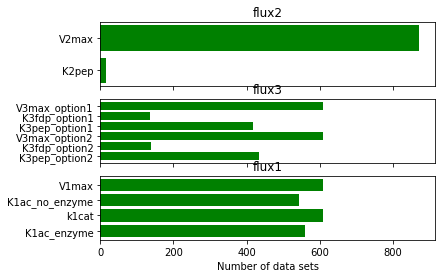

In [4]:
import numpy as np
from generate_expdata import generate_expdata
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from process_ident_data import process_info
from kotte_model import write_results_2_file
from plot_ident_results import flux_parameter_plot_data


# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get noisy experimental system steady state data
noisy_exp_xss, noisy_exp_fss, noisy_exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(noisy_exp_xss, noisy_exp_fss, perturbation_details, 3, exp_flux_index)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=1000)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info(ident_details,
                                                                               experimental_datasets,
                                                                               perturbation_details)

# plot results
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
flux_parameter_plot_data(original_data_ident)